<a href="https://colab.research.google.com/github/Titas23/IS-170-Machine-Learning/blob/K-Means-Clustering/HW4_Andres_Perez_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# call the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# I pulled a dataset from Spotify and its a list of values for songs. 
df=pd.read_csv("data.csv")
df.head(100)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.783,0.8360,0,-9.223,0,0.0486,0.3960,0.023600,0.1350,0.8310,108.966,222667,4,0
96,0.830,0.6120,10,-7.446,0,0.0790,0.1120,0.000000,0.0892,0.2520,97.989,243956,4,1
97,0.832,0.5530,7,-13.705,1,0.0487,0.0422,0.003560,0.2490,0.8900,119.825,215693,4,0
98,0.764,0.8120,7,-4.946,1,0.1790,0.2020,0.000000,0.1260,0.7420,139.961,194973,4,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [ ]:
print(df.shape)

(195, 14)


In [ ]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [ ]:
#remove the missing values with NaNs
df=df.dropna(subset=['energy','danceability'])
print(df.shape)

(195, 14)


Text(0, 0.5, 'Energy')

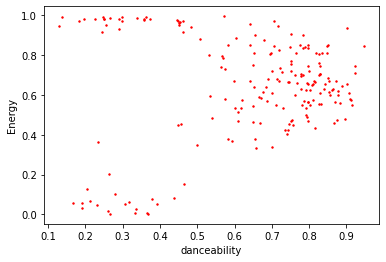

In [ ]:
#scatter plot
plt.scatter(df['danceability'],df['energy'], c='red', s=2)
plt.xlabel("danceability")
plt.ylabel("Energy")


In [ ]:
#For now, we'll try k value 2
k=2
X=np.array(list(zip(df['danceability'], df['energy'])))
model=KMeans(n_clusters=k)
kmeans=model.fit(X)
labels=model.predict(X)
centroids=model.cluster_centers_

print(labels)
print(centroids)


[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0]
[[0.67889595 0.70831214]
 [0.3045     0.08891545]]


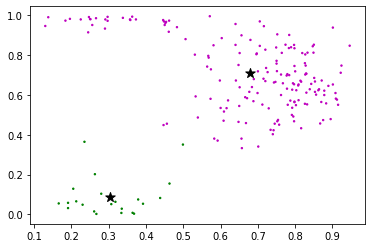

In [ ]:
#Plot the data and centroids on a scatter plot
#map the labels to colors

c=['m','g','b','r','y','c']
colors=[c[i] for i in labels]

plt.scatter(df['danceability'], df['energy'], c=colors, s=2)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')

Based on the danceabilitiy and energy the Spotify playlist will suggest similar songs to the user. 

In [ ]:
#Using the model that you have just trained, 
#you can use it to predict what cluster for any data pt

cluster=model.predict([[35,123]])[0]
print(c[cluster])


m


In [ ]:
#To determine the silhouette coefficient/score

from sklearn.metrics import silhouette_score

model=KMeans(n_clusters=2)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=2): {silhouette_score(X,label)}')


model=KMeans(n_clusters=3)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=3): {silhouette_score(X,label)}')


model=KMeans(n_clusters=4)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=4): {silhouette_score(X,label)}')


silhouette Score (n=2): 0.597988720396511
silhouette Score (n=3): 0.5845639657673715
silhouette Score (n=4): 0.44872754070390214


[[0.83722917 0.5935625 ]
 [0.55870833 0.89366667]
 [0.2952381  0.07643524]
 [0.77708696 0.77258696]
 [0.64594444 0.49802778]
 [0.2676     0.9741    ]]


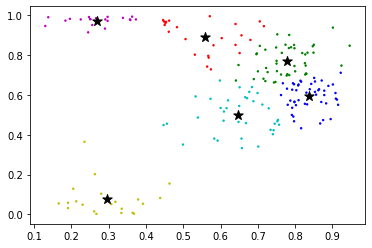

In [ ]:
k=6
X=np.array(list(zip(df['danceability'],df['energy'])))

kmeans=KMeans(n_clusters=k)
kmeans=kmeans.fit(X)
labels=kmeans.predict(X)
centroids=kmeans.cluster_centers_

#map the labels to colors
c=['b','r','y','g','c','m']
colors=[c[i] for i in labels]

plt.scatter(df['danceability'],df['energy'],c=colors,s=2)
plt.scatter(centroids[:,0],centroids[:,1],marker='*',s=100,c='black')

print(centroids)


Based on the centoids the Spotify playlist will suggest more songs with similar danceability and energy. This could be used for someone who uses playlists for working out.  